# Abalone Case Study
Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


# Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

# importing libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading dataset

In [2]:
df_albalone=pd.read_csv(r'C:\Users\Rohan\OneDrive\Desktop\abalone.csv')

In [3]:
df_albalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## we have 4177 rows and 9 columns

In [5]:
df_albalone.shape

(4177, 9)

In [6]:
df_albalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [7]:
df_albalone.info

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.141

### using label encoder 

In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_albalone['Sex'] = le.fit_transform(df_albalone['Sex'])

df_albalone['Sex'].value_counts   # 0 for female, 1 for Infants, 2 for Male

<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32>

## checking null values

In [8]:
df_albalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

## there are no null values in the dataset

# checking statistical values

In [77]:
df_albalone.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.121693,0.828742,0.294220,0.161815,0.208030,2.350877
std,0.822240,0.120093,0.099240,0.031227,0.490389,0.158794,0.091183,0.110190,0.286322
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001499,0.693147
25%,0.000000,0.450000,0.350000,0.103327,0.441500,0.170586,0.089384,0.122218,2.197225
50%,1.000000,0.545000,0.425000,0.123127,0.799500,0.289680,0.157858,0.210261,2.302585
75%,2.000000,0.615000,0.480000,0.142125,1.153000,0.406798,0.225541,0.284427,2.484907
max,2.000000,0.815000,0.650000,0.563108,2.825500,0.911479,0.565314,0.695644,3.401197


# checking class imbalace by plotting

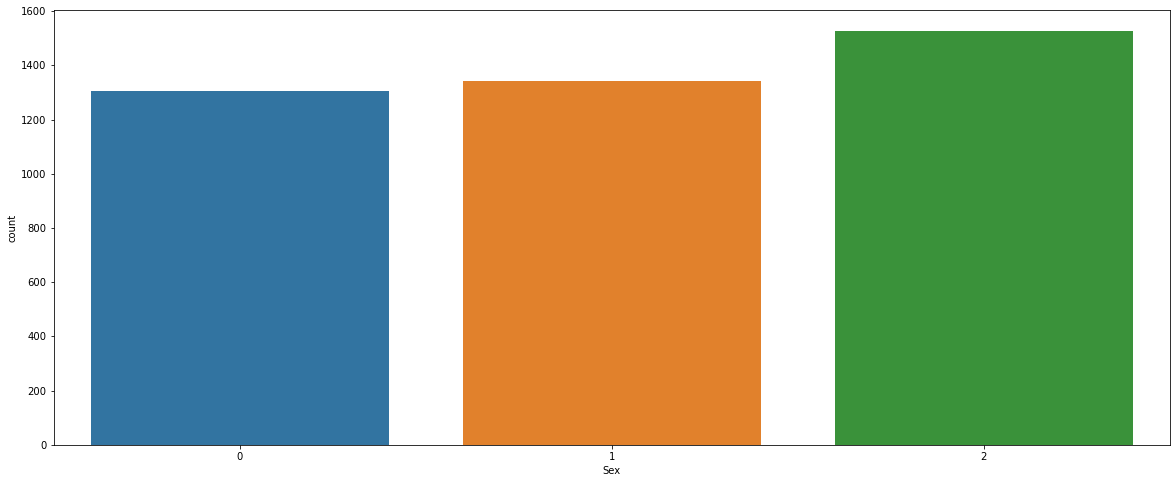

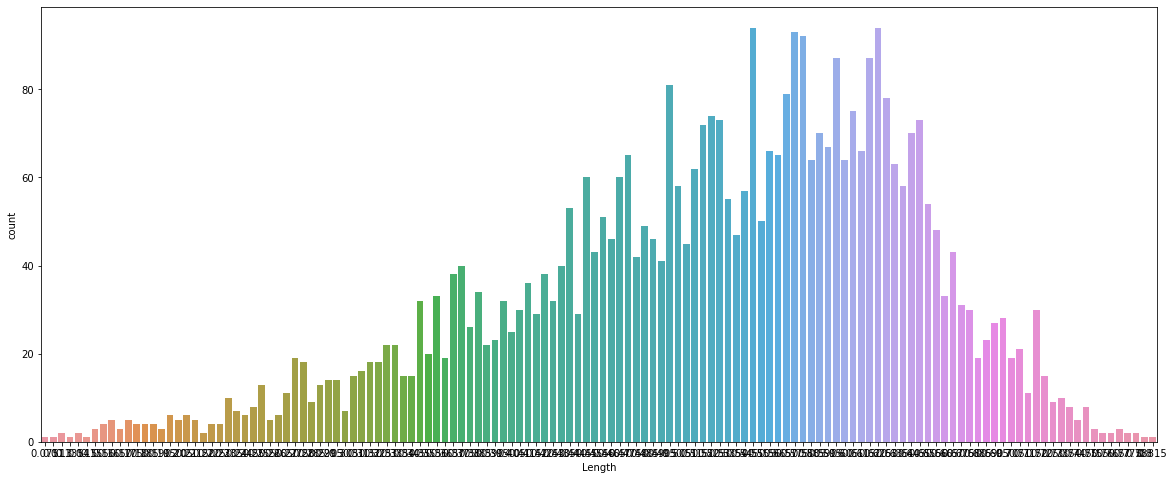

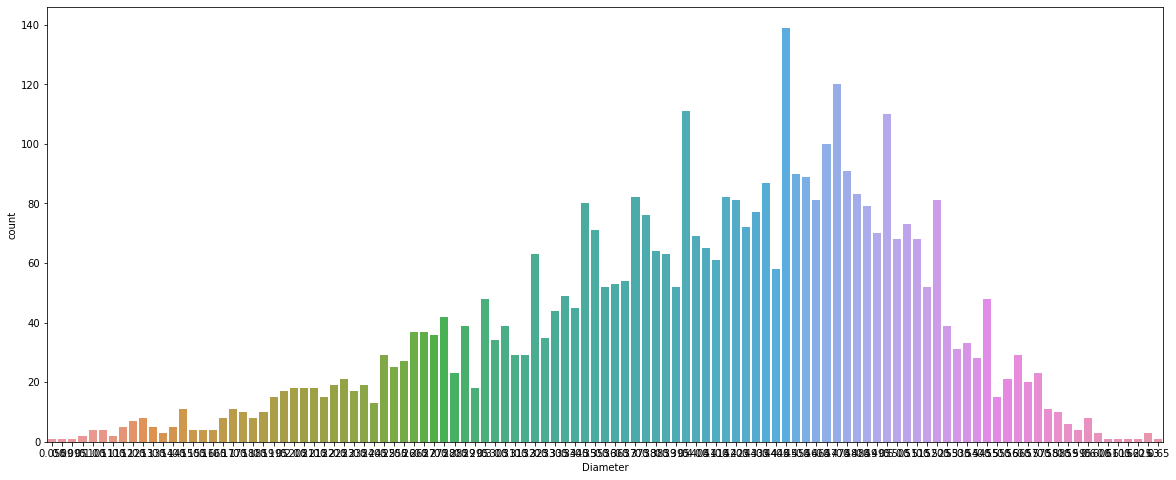

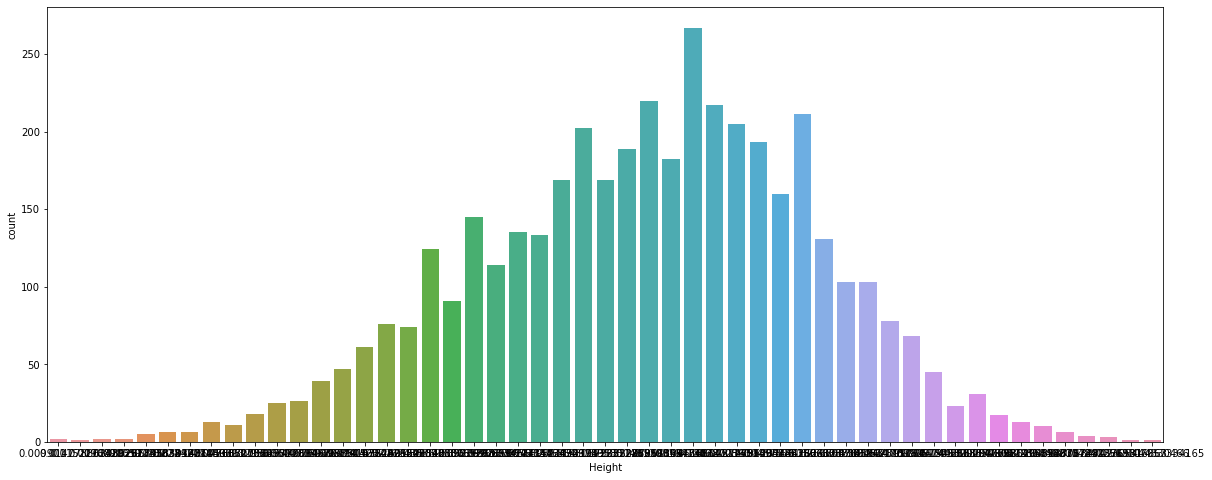

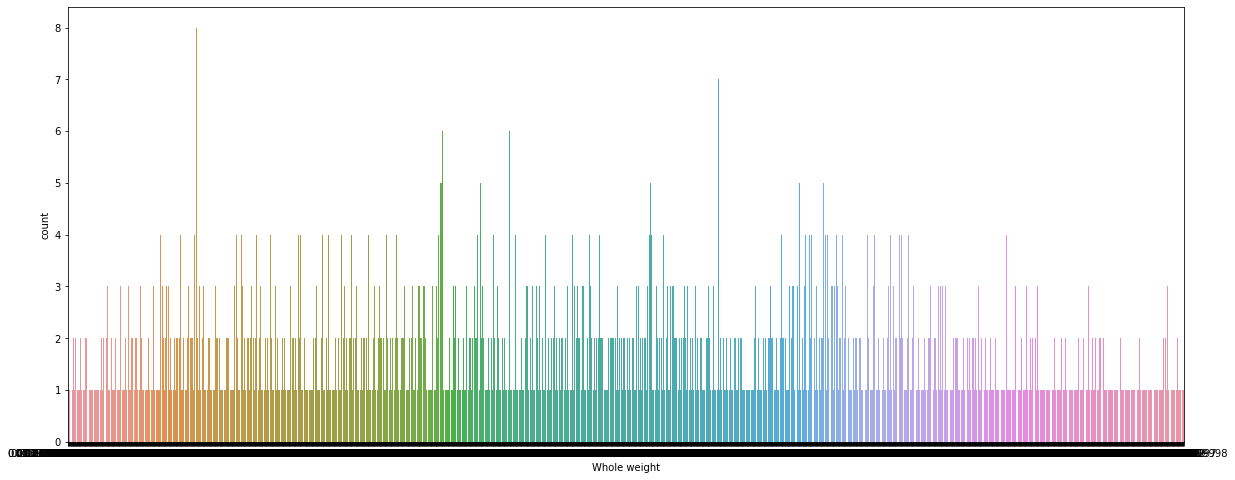

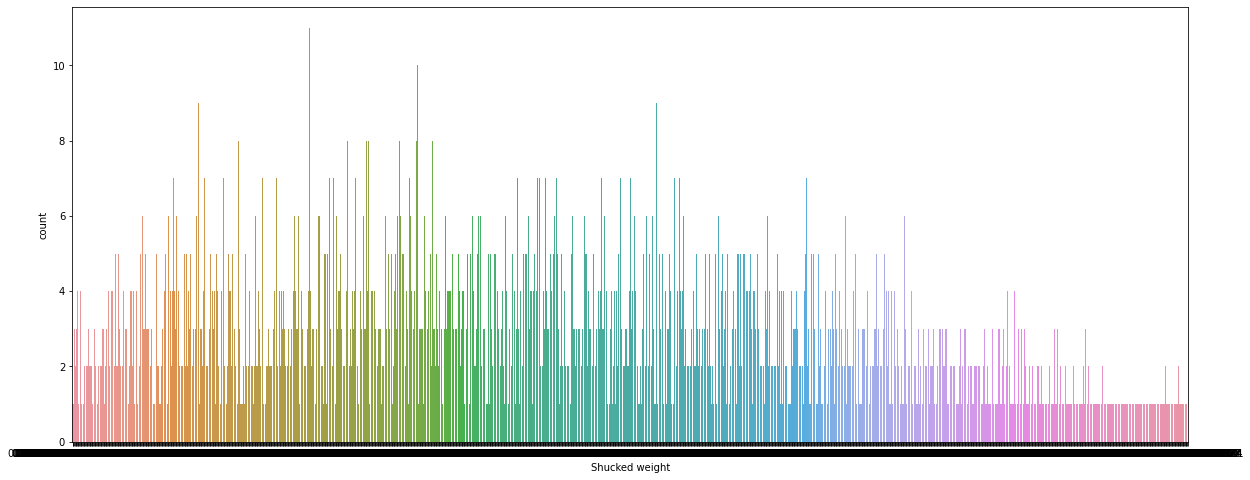

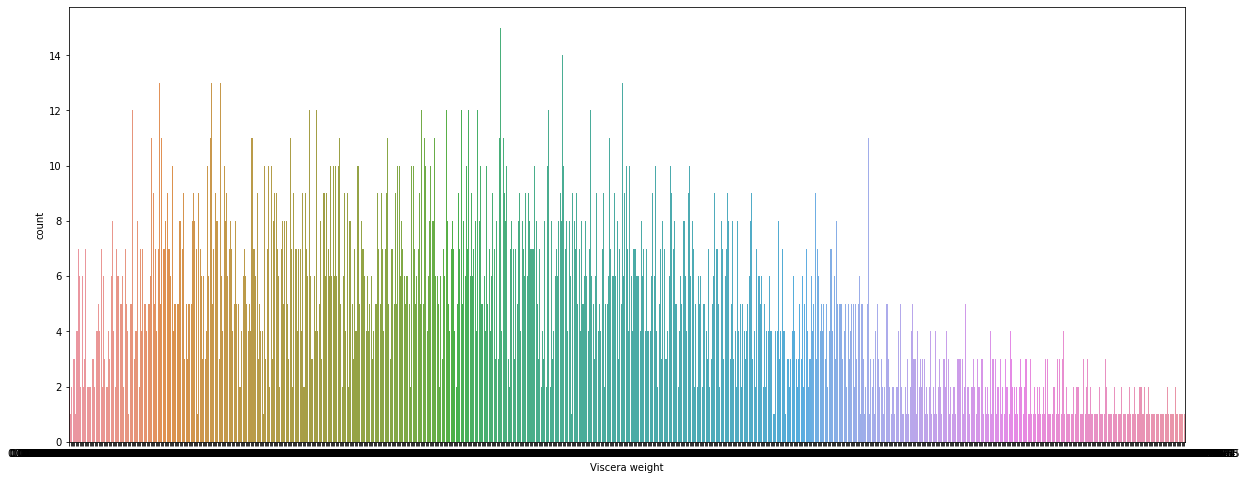

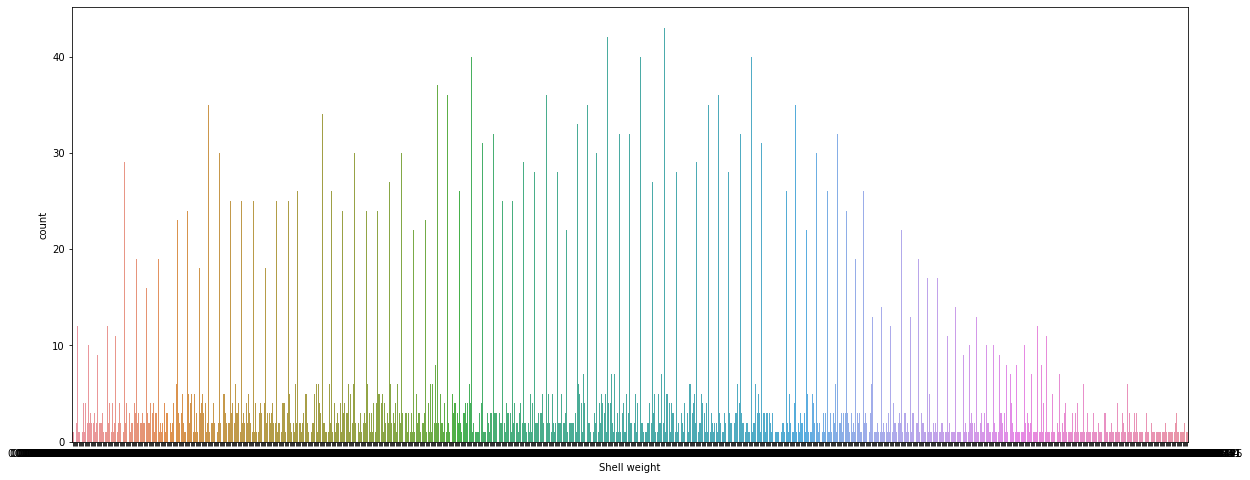

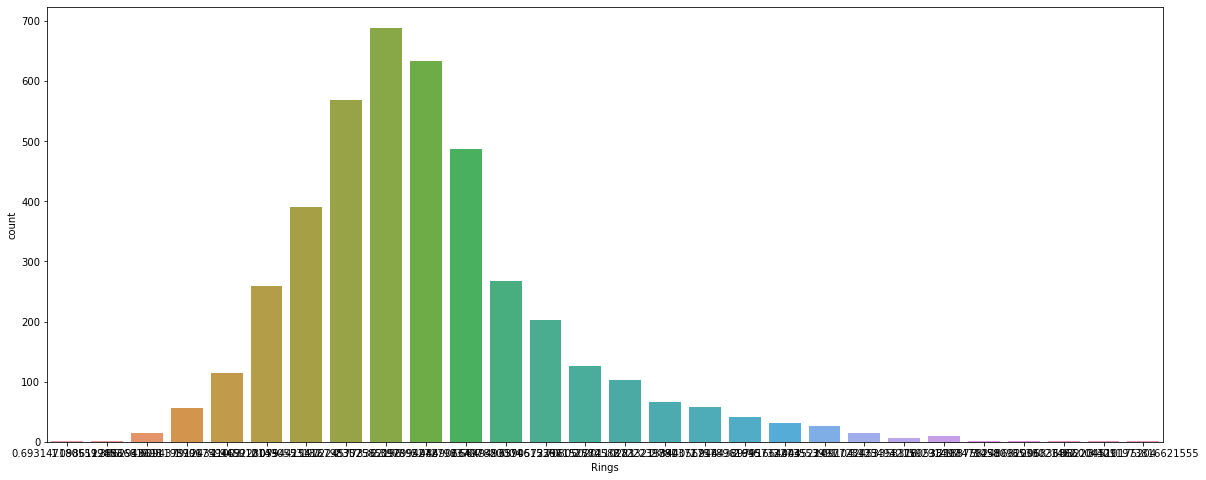

In [78]:
# for loop features to plot the graph
list=['Sex','Length',            
'Diameter',          
'Height',            
'Whole weight',      
'Shucked weight',    
'Viscera weight',    
'Shell weight',      
'Rings']

for i in list:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df_albalone)
    plt.show()

# class are balance

## checking for outliers

Sex                  AxesSubplot(0.125,0.826831;0.227941x0.053169)
Length            AxesSubplot(0.398529,0.826831;0.227941x0.053169)
Diameter          AxesSubplot(0.672059,0.826831;0.227941x0.053169)
Height               AxesSubplot(0.125,0.763028;0.227941x0.053169)
Whole weight      AxesSubplot(0.398529,0.763028;0.227941x0.053169)
Shucked weight    AxesSubplot(0.672059,0.763028;0.227941x0.053169)
Viscera weight       AxesSubplot(0.125,0.699225;0.227941x0.053169)
Shell weight      AxesSubplot(0.398529,0.699225;0.227941x0.053169)
Rings             AxesSubplot(0.672059,0.699225;0.227941x0.053169)
dtype: object

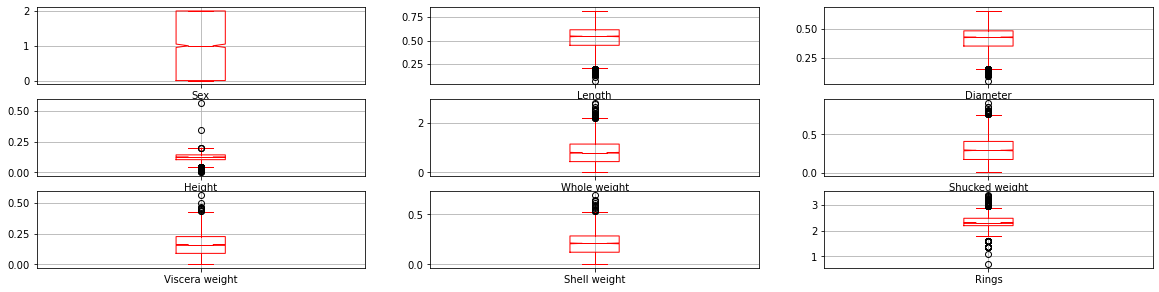

In [79]:
df_albalone.plot(kind='box',subplots=True,layout=(12,3),figsize=(20,20),grid=True,notch=True,color='red',legend=True)

### there are outliers in the dataset

## checking disturbuition 

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

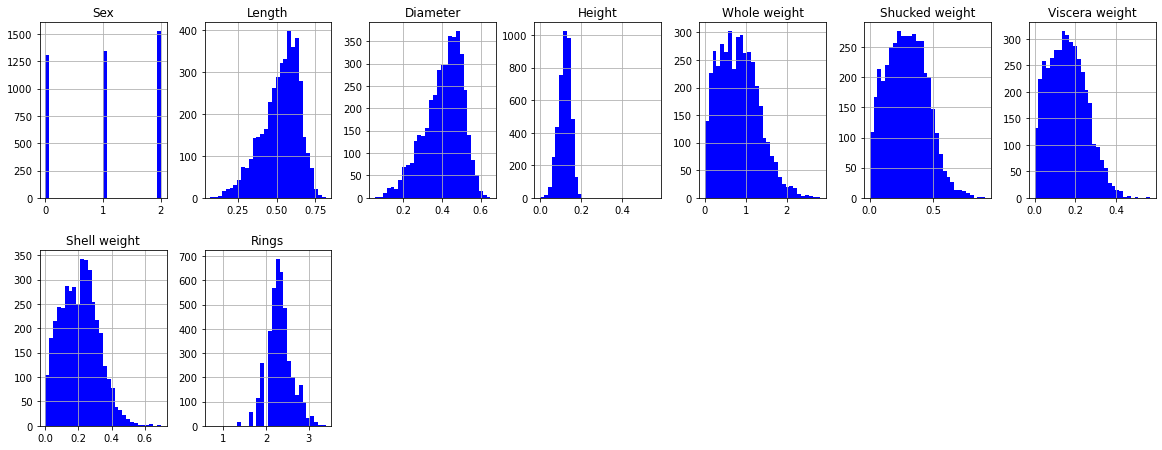

In [80]:
df_albalone.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='blue')

### some features are left skewed 

## checking correlation

In [16]:
df_albalone.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


## checking skewness

In [81]:
df_albalone.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            0.351391
Whole weight      0.530959
Shucked weight    0.306439
Viscera weight    0.375637
Shell weight      0.315321
Rings            -0.061317
dtype: float64

## removing skewness

In [82]:
for i in df_albalone.columns:
    if df_albalone.skew().loc[i]>0.55:
        df_albalone[i]=np.log1p(df_albalone[i])

In [83]:
df_albalone.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            0.351391
Whole weight      0.530959
Shucked weight    0.306439
Viscera weight    0.375637
Shell weight      0.315321
Rings            -0.061317
dtype: float64

## removing outliers

In [84]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_albalone))
z.shape

(4177, 9)

In [127]:
df_albalonenew=df_albalone[(z<3).all(axis=1)]
print(df_albalone.shape)
print(df_albalonenew.shape)

(4177, 9)
(4101, 9)


In [86]:
loss_percent=((4177-4027)/4177)*100
loss_percent

3.5910940866650707

# 3.591% data is lost

# bivariant analysis

# relation between sex and rings

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

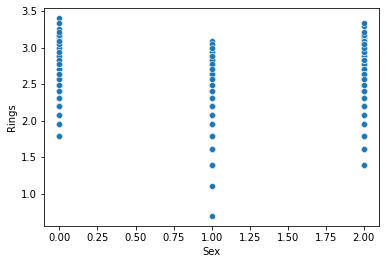

In [88]:
sns.scatterplot(x="Sex",y="Rings",data=df_albalone)


# relation between length and rings

<AxesSubplot:xlabel='Length', ylabel='Rings'>

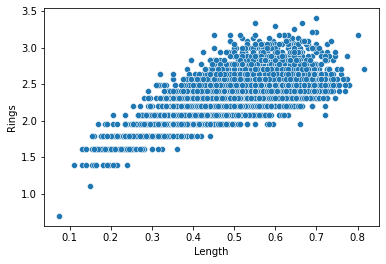

In [89]:

sns.scatterplot(x="Length",y="Rings",data=df_albalone)


# relation between diameter and rings

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

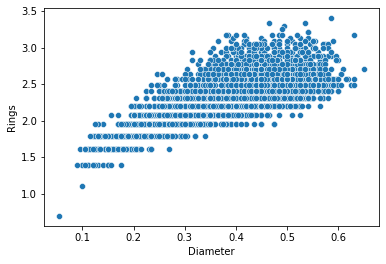

In [90]:
sns.scatterplot(x="Diameter",y="Rings",data=df_albalone)

# relation between height and rings

<AxesSubplot:xlabel='Height', ylabel='Rings'>

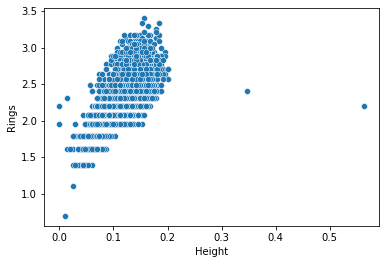

In [91]:
sns.scatterplot(x="Height",y="Rings",data=df_albalone)

# relation between shucked weight and rings

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

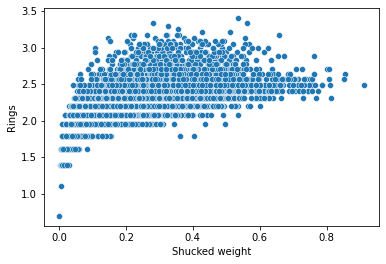

In [98]:
sns.scatterplot(x="Shucked weight",y="Rings",data=df_albalone)

# relation between whole weight and rings

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

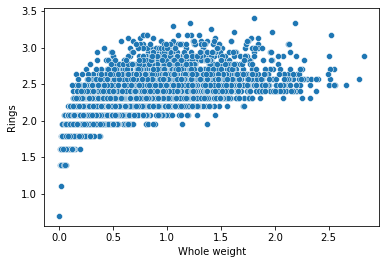

In [97]:
sns.scatterplot(x="Whole weight",y="Rings",data=df_albalone)

# relation between viscera weight and and rings

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

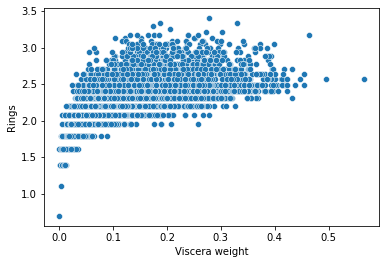

In [99]:
sns.scatterplot(x="Viscera weight",y="Rings",data=df_albalone)

# relation between shell weight and rings

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

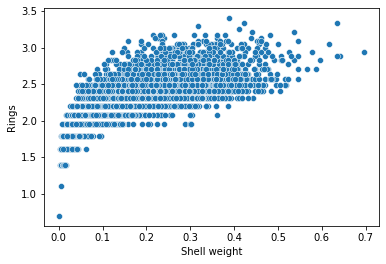

In [100]:
sns.scatterplot(x="Shell weight",y="Rings",data=df_albalone)

# checking disturbuition again

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

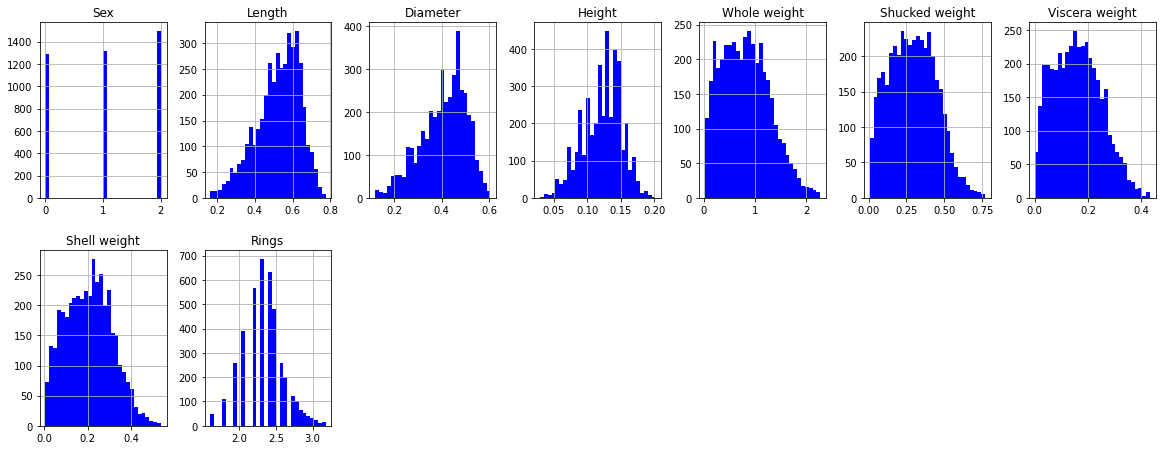

In [128]:
df_albalonenew.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='blue')

# spliting variables into x and y

In [130]:
x=df_albalonenew.drop("Rings",axis=1)
y=df_albalonenew["Rings"]

In [ ]:
# using standard scaling

In [144]:
from sklearn.preprocessing import StandardScaler
Sc= StandardScaler()
x=Sc.fit_transform(x)
x

array([[ 1.1533618 , -0.60267985, -0.4527933 , ..., -0.5872204 ,
        -0.73213735, -0.63171313],
       [ 1.1533618 , -1.51257926, -1.49973341, ..., -1.2898245 ,
        -1.28529138, -1.31415468],
       [-1.27785729,  0.04724829,  0.12302376, ..., -0.41888915,
        -0.32315209, -0.15034958],
       ...,
       [ 1.1533618 ,  0.65384789,  0.69884082, ...,  0.84692987,
         1.0395064 ,  0.58675672],
       [-1.27785729,  0.87049061,  0.80353483, ...,  0.87041301,
         0.8040477 ,  0.49952314],
       [ 1.1533618 ,  1.60707584,  1.53639291, ...,  2.4338143 ,
         1.79626138,  1.85150595]])

# model training

# finding random state

In [145]:
from sklearn.linear_model import LinearRegression
maxScore=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predlm=lm.predict(x_test)
    sc=lm.score(x_train,y_train)
    if sc>maxScore:
        maxScore=sc
        maxRs=i
print("Best Accuracy is ", maxScore,"on Random_State",maxRs)

Best Accuracy is  0.5818013171863446 on Random_State 19


In [132]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=19)

In [133]:

x_train.shape

(3280, 8)

In [134]:
y_train.shape

(3280,)

In [135]:
x_test.shape

(821, 8)

In [136]:
y_test.shape

(821,)

In [137]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [138]:

lm.coef_

array([ 0.00846286,  0.16727518,  1.42946748,  3.23881912,  0.2613572 ,
       -1.89242236, -0.50066447,  1.3308357 ])

In [139]:
lm.intercept_

1.4238315589187804

In [140]:

lm.score(x_train,y_train)

0.5818013171863445

In [141]:

#predict the value
pred=lm.predict(x_test)
print("Predicted Rings:",pred)
print("Actual Rings",y_test)

Predicted Rings: [2.65719792 2.20384573 2.63731239 1.96024032 1.90771514 2.0939895
 2.42954382 2.19476711 2.30982076 2.49456191 2.27873475 1.90985396
 2.54974206 1.86349663 2.71267514 2.26188615 2.35442421 2.38471987
 2.36142333 2.07436199 2.79438225 2.48694933 2.43438019 2.44426702
 2.49135842 2.3903481  2.4884934  2.55031418 2.28168941 2.34601184
 2.2857788  2.11294909 2.39589448 2.52943115 2.12493645 2.09217651
 2.20831531 2.41825732 2.32229702 2.5499199  2.46152693 2.34146557
 2.61407673 2.36125091 2.50911466 2.4072934  2.33101818 2.09521702
 1.89231654 2.18536747 2.43935808 2.45052919 2.28606781 2.54788193
 2.51791924 2.22598115 2.18194338 2.11275754 2.3230713  2.7140193
 2.40567039 1.81594477 2.00897337 2.30718409 2.34096555 2.19600481
 2.59049668 2.41692699 2.30128439 2.25753202 2.01487752 2.14020331
 2.68865489 2.24154959 2.40532523 1.94869891 2.14991308 2.52988776
 2.60204907 2.14227846 2.38417766 2.21935921 2.90236322 2.45689627
 2.07687258 2.29848942 2.33962265 2.58174924 2.

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('error:')

print('Mean Absolute error: ',mean_absolute_error(y_test,pred))

print('Mean Squared error: ',mean_squared_error(y_test,pred))

print('Root Mean Squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean Absolute error:  0.1471323797341513
Mean Squared error:  0.036506138991116835
Root Mean Squared error:  0.19106579754397918


In [143]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.5028627363541864


In [123]:
import joblib
joblib.dump(lm,"AbaloneCaseStudy.obj")

['AbaloneCaseStudy.obj']